In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Load the data and have a look at the sample
house_data = pd.read_csv("House_price_data.csv")
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
house_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
house_data_nadrop = house_data.dropna(axis=1)

In [9]:
house_data_nadrop.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
house_data_nadrop.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 62, dtype: object

In [12]:
house_data_nadrop = house_data_nadrop.select_dtypes(exclude=['object'])

In [14]:
house_data_nadrop.shape

(1460, 35)

In [15]:
house_data_nadrop.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [16]:
target = house_data_nadrop['SalePrice']

In [17]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [18]:
#drop Saleprice and store rest of the data to features
features = house_data_nadrop.drop('SalePrice', axis = 1)

#Drop Id as we do not need it for modelling purpose
features = features.drop(['Id'], axis = 1)

In [20]:
#Split the data into train and validation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [21]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_pred = clf.predict(X_test)

In [24]:
y_pred[0:100]

array([179364.54380563, 217683.4217313 , 114376.48219693, 155292.50835089,
       291454.55340658, 278233.33735811, 264296.79148247,  85486.97678582,
       201966.04722684, 160256.245452  , 181488.69187486, 184157.79184381,
       259728.09364069,  73501.06387485, 199254.73753531, 171225.94335173,
       283565.97474035, 151520.32061377, 227496.45304508, 195340.19496101,
       387909.73791783, 109086.95316402, 112289.477317  , 101832.61187959,
       204969.2011    , 169812.02603567, 152162.98364977,  91463.76763463,
       153470.59774412, 217782.1378693 , 112746.99079116, 153669.10692847,
       113002.37417609, 117851.70541971, 151258.62075874,  39858.03273485,
       151669.99144242, 213388.45876147, 309603.64085771, 156794.45551663,
       233845.61846847, 130116.30701631, 106208.20094474, 182373.45866946,
       226165.5865769 , 247920.67254391, 261619.20046601, 153127.59231738,
       135297.33345671, 139292.18731297, 206134.81360364,   1749.00899773,
       179652.86382961, 1

In [27]:
y_test[1:5]

381    187750
816    137000
577    164500
35     309000
Name: SalePrice, dtype: int64

In [28]:
y_pred[1:5]

array([217683.4217313 , 114376.48219693, 155292.50835089, 291454.55340658])

In [29]:
difference = y_test - y_pred

In [30]:
difference

854     -9364.543806
381    -29933.421731
816     22623.517803
577      9207.491649
35      17545.446593
            ...     
970     80898.590058
598     21309.354005
1058    16789.195080
1018   -32269.140113
387    -32781.087126
Name: SalePrice, Length: 292, dtype: float64

In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8232260146339861

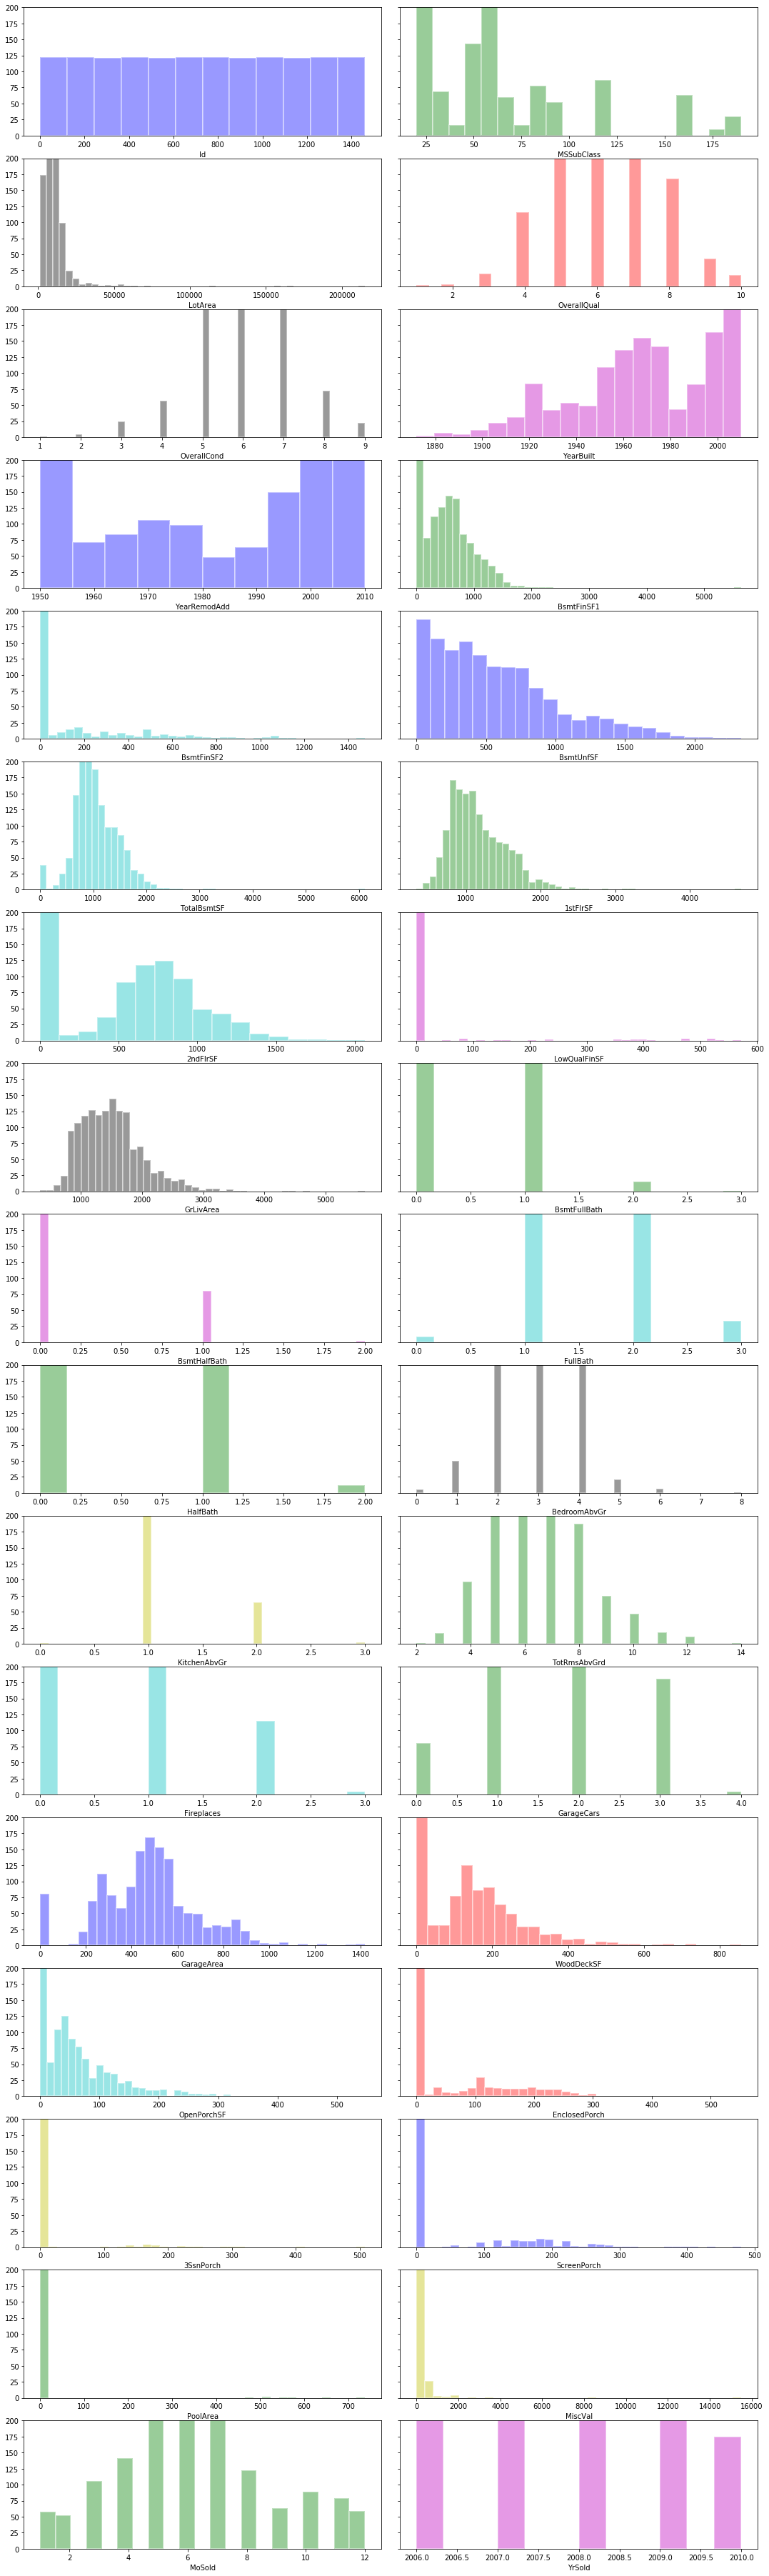

In [32]:
import seaborn as sns
colors = np.array('b g r c m y k'.split()) #Different colors for plotting

fig,axes = plt.subplots(nrows =17,ncols=2, sharey=True,figsize = (15,50))
plt.tight_layout()
row = 0
iteration = 0
for j in range(0,len(house_data_nadrop.columns[:-1])):
    iteration+=1
    if(j%2==0):
        k = 0
    else:
        k = 1
    sns.distplot(house_data_nadrop[house_data_nadrop.columns[j]],kde=False,hist_kws=dict(edgecolor="w", linewidth=2),
                 color = np.random.choice(colors) ,ax=axes[row][k])
    if(iteration%2==0):
        row+=1
        plt.ylim(0,200)    

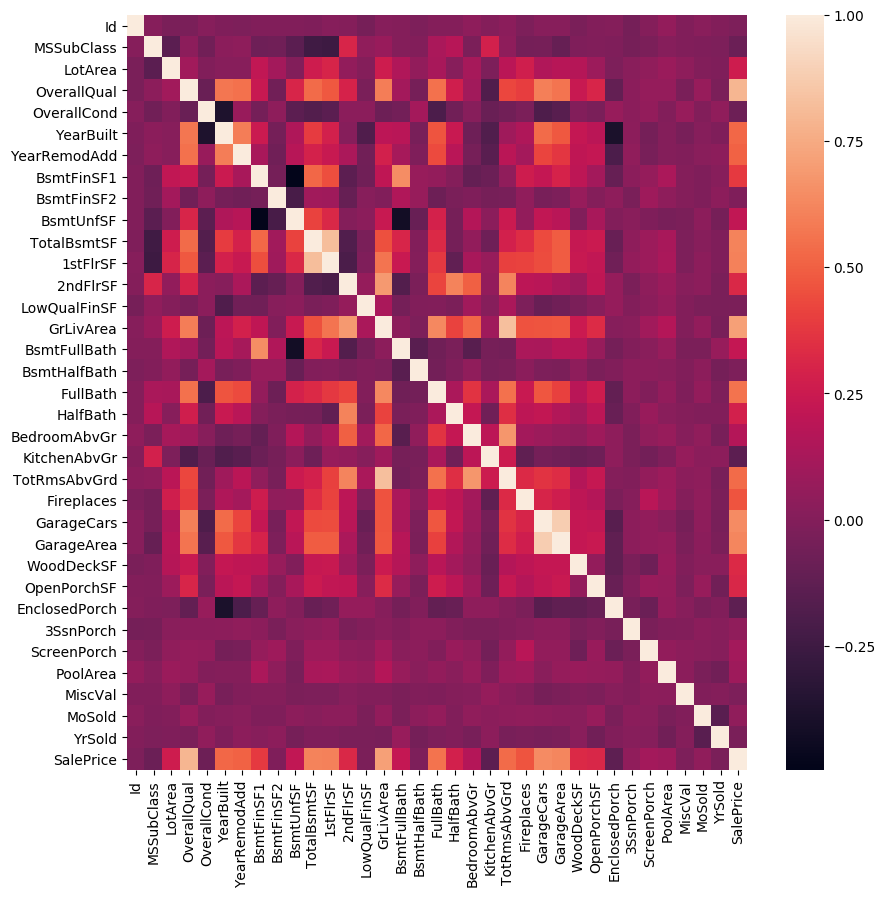

In [33]:
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(house_data_nadrop.corr())

In [34]:
#Select SalePrice and store into target variable
target = house_data_nadrop['SalePrice']

#drop Saleprice and store rest of the data to features
# visually i selected this:
features = house_data_nadrop[['GrLivArea', '1stFlrSF', 'YearBuilt', 'OverallQual']].copy()

features.head()

,GrLivArea,1stFlrSF,YearBuilt,OverallQual
0,1710,856,2003,7
1,1262,1262,1976,6
2,1786,920,2001,7
3,1717,961,1915,7
4,2198,1145,2000,8


In [35]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

In [38]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [39]:
y_pred[1:5]

array([212083.12261587, 115718.79102825, 146772.68695781, 287275.3015263 ])

In [40]:
y_test[1:5]

381    187750
816    137000
577    164500
35     309000
Name: SalePrice, dtype: int64

In [41]:
r2_score(y_test, y_pred)

0.7790700122752138

In [43]:
features = house_data_nadrop[['YearBuilt']].copy()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

0.3090474514721291

In [44]:
y_pred[1:5]

array([228093.80213856, 157999.41706494, 174175.04438962, 225397.86425111])

In [45]:
y_test[1:5]

381    187750
816    137000
577    164500
35     309000
Name: SalePrice, dtype: int64

In [46]:
y_pred - y_test

854     -10652.613991
381      40343.802139
816      20999.417065
577       9675.044390
35      -83602.135749
            ...      
970      16259.572346
598     -28497.297229
1058   -104210.259974
1018     47874.267983
387      62654.733827
Name: SalePrice, Length: 292, dtype: float64

In [47]:
features = house_data_nadrop[['GrLivArea']].copy()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

0.5256162223752306

In [48]:
features = house_data_nadrop[['GrLivArea','YearBuilt']].copy()
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
r2_score(y_test, y_pred)

0.661155061597589

In [ ]:
# how to get automatically the 25% most informative features
#by Zak, Octavi and Tjerk:

In [51]:
df = house_data_nadrop.corr()

In [69]:
nr_features = abs(df.SalePrice).sort_values().shape[0]

In [77]:
featuresQuantile = abs(df.SalePrice).sort_values()[int(0.75*nr_features):int(1*nr_features)]
featuresQuantile

TotRmsAbvGrd    0.533723
FullBath        0.560664
1stFlrSF        0.605852
TotalBsmtSF     0.613581
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
OverallQual     0.790982
SalePrice       1.000000
Name: SalePrice, dtype: float64